# Flower Species EDA and Classification

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

## **Objective**

Explore the Iris dataset through detailed analysis and build a robust classification model for flower species prediction

In [2]:
df = pd.read_csv('/kaggle/input/iris/Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Overview**

- The Iris dataset is one of the most iconic datasets in machine learning, containing 150 observations of Iris flowers from three species. This notebook will explore the dataset comprehensively and guide readers through building a classification model.

**Goals of the Notebook**:

- Perform comprehensive EDA to understand patterns and relationships.
- Visualize the dataset in creative ways.
- Build, evaluate, and compare classification models.

In [4]:
df.shape

(150, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


**Observations:**

The Sepal Length ranges from [4.3] to [7.9] with a mean of [5.8433] cm
.
The Sepal Width ranges from [2.0] to [4.4] with a mean of [3.0540] cm.
The Petal Length ranges from [1.0] to [6.9] with a mean of [3.758] cm.
The Petal Width ranges from [0.100000] to [2.500000] with a mean of [1.198667] cm.

# Exploratory Data Analysis

**Univariate Analysis**

In [11]:
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

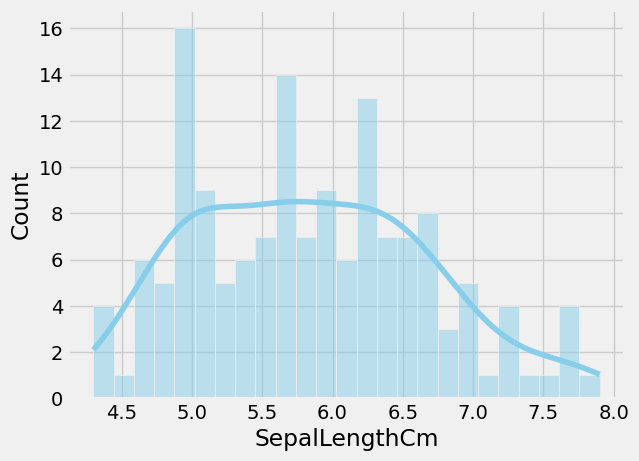

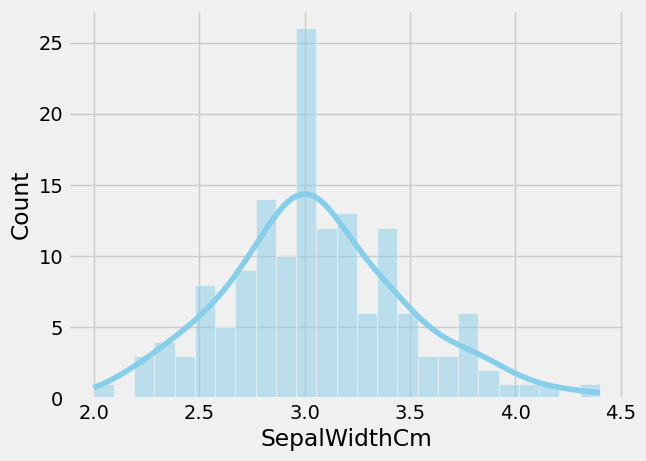

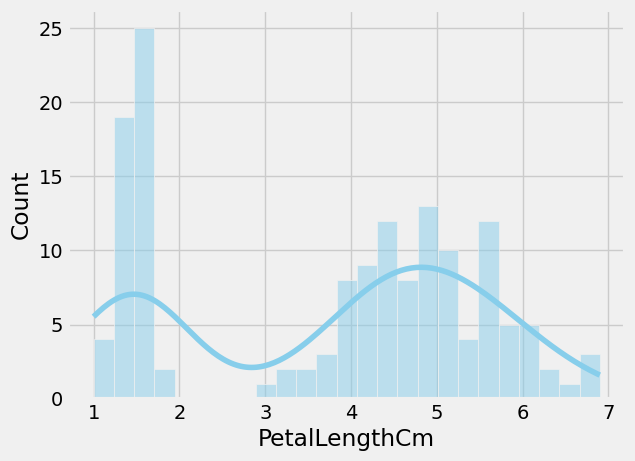

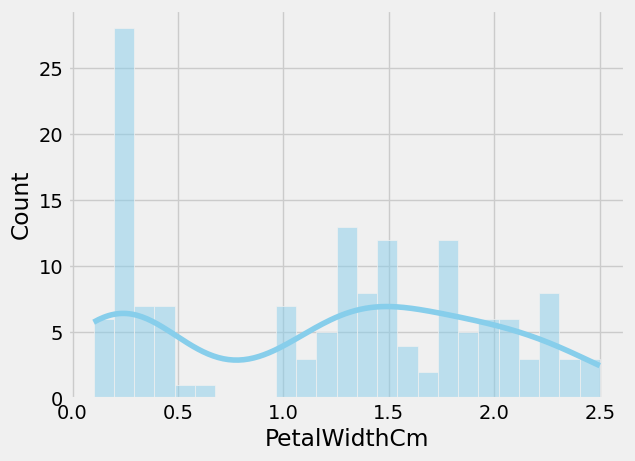

In [14]:
for col in features:
    sns.histplot(x = col, data = df, kde = True, color = 'skyblue', bins = 25)
    plt.show()

## Insights and Observations from Histograms

- Sepal Length

The distribution appears approximately normal, with a slight skew toward higher values.
Most sepal lengths fall between 5 and 7 cm.
There is a clear range overlap between the three species, indicating that this feature alone may not be a strong differentiator.

- Sepal Width

The distribution is less uniform, showing a wider spread compared to sepal length.
Values mostly range between 2.5 and 4 cm, with a few samples below 2.5 cm that could potentially be outliers.
Overlapping ranges among species suggest limited separability for classification based solely on this feature.

- Petal Length

The distribution shows two distinct clusters:
A smaller group with shorter petal lengths (likely Iris setosa).
A larger group with longer petal lengths (likely Iris versicolor and Iris virginica).
This indicates petal length is a strong indicator for differentiating Iris setosa from the other two species.

- Petal Width

The distribution shows a similar pattern to petal length, with two clear clusters.
Most petal widths fall between 0.1–0.6 cm (for Iris setosa) or 1–2.5 cm (for the other two species).
Petal width is likely another strong feature for distinguishing between species.

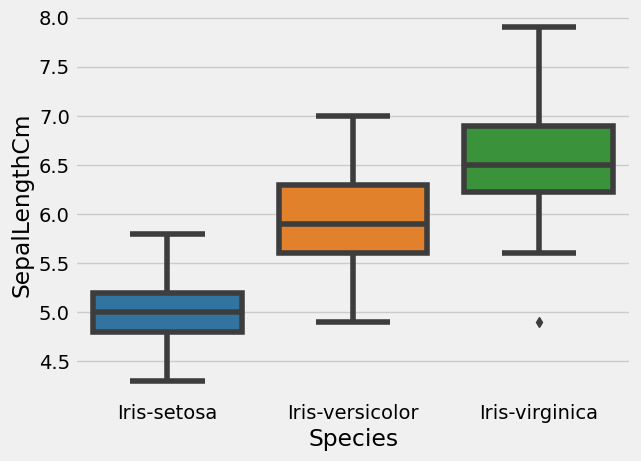

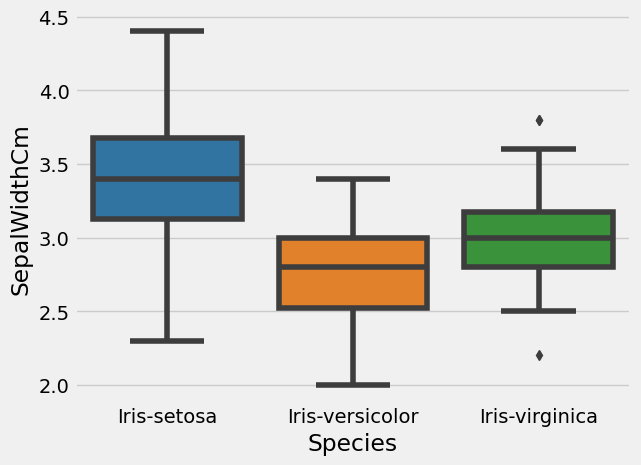

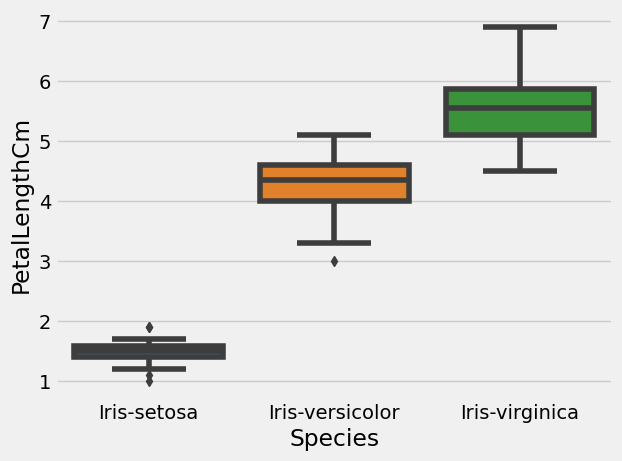

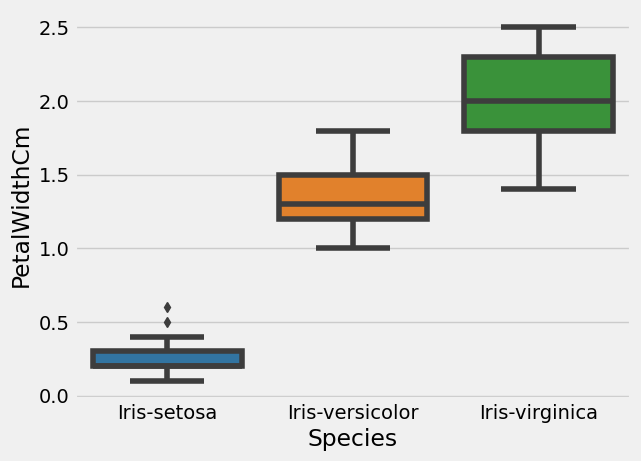

In [18]:
for col in features:
    sns.boxplot(x = 'Species', y = col , data = df, palette = 'tab10')
    plt.show()

### **Insights and Observations from Box Plots**

1. **Sepal Length**  
   - **Iris setosa** has the shortest median sepal length, with minimal variation (tight interquartile range).  
   - **Iris virginica** shows the highest median sepal length, with a wider range compared to the other species.  
   - **Iris versicolor** falls in between, with some overlap in the range of values with both **Iris setosa** and **Iris virginica**, making this feature moderately useful for distinguishing species.

2. **Sepal Width**  
   - **Iris setosa** has the highest median sepal width and the least variation.  
   - **Iris virginica** and **Iris versicolor** show overlapping ranges with smaller median sepal widths compared to **Iris setosa**.  
   - The presence of outliers is more evident in **Iris virginica**, suggesting a few flowers with unusually wide sepals.  
   - Sepal width is less discriminatory between species compared to other features.

3. **Petal Length**  
   - **Iris setosa** exhibits a significantly smaller median petal length compared to **Iris versicolor** and **Iris virginica**, with no overlap in the interquartile ranges. This makes petal length an excellent feature for separating **Iris setosa** from the other two species.  
   - **Iris virginica** has the largest petal length, with a higher median than **Iris versicolor**, but their interquartile ranges overlap slightly.

4. **Petal Width**  
   - Similar to petal length, **Iris setosa** has the smallest median petal width with no overlap with the other two species, reinforcing its discriminative power.  
   - **Iris virginica** has a higher median petal width compared to **Iris versicolor**, with minimal overlap, suggesting this feature can differentiate between the two species to some extent.
pecie
### **General Insights**
- **Petal features (length and width)** are the most distinguishing attributes between the three species. They can effectively separate **Iris setosa** from **Iris versicolor** and **Iris virginica**, with some degree of separability between **Iris versicolor** and **Iris virginica**.  ** and **Iris virginica**.  
- **Sepal features (length and width)** exhibit significant overlap between species, making them less effective for classification when used independently.  


In [20]:
df.drop('Id',axis =1, inplace = True)

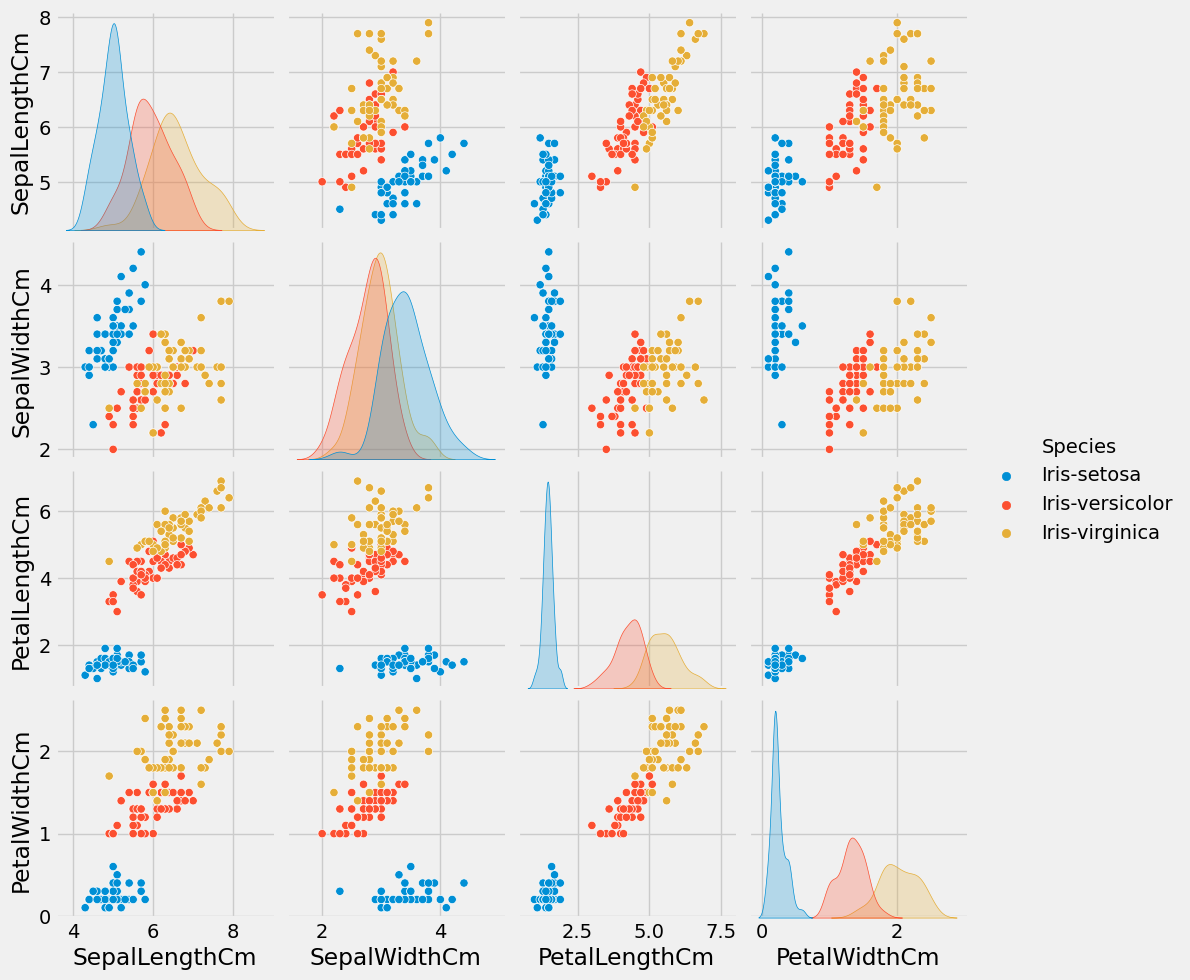

In [21]:
sns.pairplot(df,hue = 'Species')

From the **pair plot** of the Iris dataset, let's break down the **diagonal** and **off-diagonal** analysis.

### **Diagonal Analysis (Distribution of individual features)**

- The **diagonal** of the pair plot typically shows the univariate distribution of each attribute (in this case, **Sepal Length**, **Sepal Width**, **Petal Length**, and **Petal Width**), represented as **Kernel Density Estimation (KDE)** plots.
  
  **Observations:**
  - **Sepal Length**: Shows distinct peaks for **Iris setosa** (blue), which has a higher frequency of smaller values, while **Iris versicolor** (orange) and **Iris virginica** (green) have overlapping peaks, but **Iris virginica** has larger values on average.
  - **Sepal Width**: **Iris setosa** (blue) has a wider distribution, with values clustering at the higher end. **Iris versicolor** and **Iris virginica** overlap, with **Iris versicolor** slightly more concentrated at lower values.
  - **Petal Length**: **Iris setosa** (blue) has significantly smaller values compared to the other two species, which show a stronger overlap. **Iris virginica** (green) has a slightly higher average petal length.
  - **Petal Width**: Like **Petal Length**, **Iris setosa** (blue) is clearly distinguishable with smaller petal widths. The distributions of **Iris versicolor** and **Iris virginica** (orange and green) are quite similar, with **Iris virginica** generally having slightly larger petal widths.

### **Off-Diagonal Analysis (Pairwise relationship between features)**

- **Sepal Length vs Sepal Width (Top-left)**:
  - **Iris setosa** (blue) is easily distinguishable from the other species, clustering in a region with smaller **sepal length** and wider **sepal width**.
  - **Iris versicolor** (orange) and **Iris virginica** (green) show more overlap, and there's no clear linear relationship between these two variables.

- **Sepal Length vs Petal Length (Top-right)**:
  - **Iris setosa** (blue) forms a separate cluster with smaller **sepal length** and **petal length**.
  - **Iris versicolor** and **Iris virginica** show a clear separation along **petal length**, with **Iris virginica** having the largest values.

- **Sepal Length vs Petal Width (Middle-right)**:
  - Again, **Iris setosa** (blue) is clearly separable with smaller **sepal length** and **petal width** values.
  - The data points for **Iris versicolor** (orange) and **Iris virginica** (green) overlap but are better separated along **petal width**.

- **Sepal Width vs Petal Length (Middle-left)**:
  - **Iris setosa** (blue) shows a clear separation with higher **sepal width** and smaller **petal length**.
  - **Iris versicolor** (orange) and **Iris virginica** (green) overlap significantly, making it difficult to distinguish them based solely on these features.

- **Sepal Width vs Petal Width (Middle-center)**:
  - **Iris setosa** (blue) is easily separated from the other two species with a higher **sepal width** and smaller **petal width**.
  - **Iris versicolor** and **Iris virginica** overlap substantially, though **Iris virginica** generally has slightly larger **petal widths**.

- **Petal Length vs Petal Width (Bottom-right)**:
  - There is a strong positive correlation between **petal length** and **petal width** for **Iris versicolor** and **Iris virginica**. Both features increase together for these two species.
  - **Iris setosa** (blue) is distinctly separated, showing much smaller **petal length** and **petal width** values.

### **Summary of Observations**:
- The **diagonal** analysis shows that each species has its own distinct distribution for both **sepal** and **petal** dimensions, with **Iris setosa** being the most separable in terms of both **petal** and **sepal features**.
- The **off-diagonal** analysis reveals that **petal length** and **petal width** are the best distinguishing features for the species, especially between **Iris setosa** and the others. **Iris versicolor** and **Iris virginica** are more difficult to separate, showing overlapping distributions in most feature pairs, though they can be distinguished based on **petal dimensions**.

This analysis shows that **petal features** are key in distinguishing between species, while **sepal features** provide less separation, particularly between **Iris versicolor** and **Iris virginica**.

## Correlation Analysis(Heatmap)

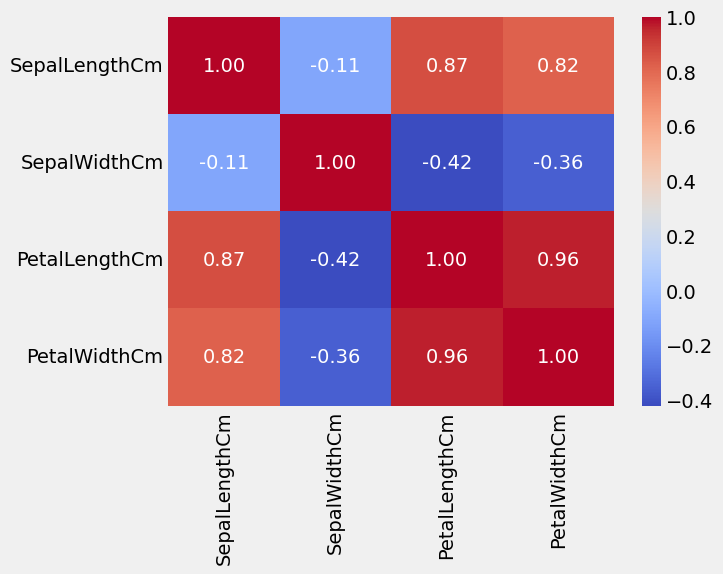

In [25]:
sns.heatmap(df.corr(numeric_only = True),annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.show()



### **Key Observations and Insights:**

1. **Sepal Length vs Petal Length (0.871754)**:
   - There is a **strong positive correlation** (0.87) between **Sepal Length** and **Petal Length**. This means that as the **Sepal Length** increases, the **Petal Length** also tends to increase. This is a noteworthy relationship and could be useful in distinguishing between species based on these features.

2. **Sepal Length vs Petal Width (0.817954)**:
   - **Sepal Length** is also strongly correlated with **Petal Width** (0.82). Like **Petal Length**, **Petal Width** increases as **Sepal Length** increases, further reinforcing that the petal dimensions are highly related to the sepal dimensions.

3. **Sepal Width vs Petal Length (-0.420516)**:
   - There is a **moderate negative correlation** (-0.42) between **Sepal Width** and **Petal Length**. As **Sepal Width** increases, **Petal Length** tends to decrease. This suggests that **Sepal Width** and **Petal Length** have an inverse relationship, which might be worth investigating further, especially when differentiating between species.

4. **Sepal Width vs Petal Width (-0.356544)**:
   - Similarly, **Sepal Width** shows a **moderate negative correlation** with **Petal Width** (-0.36). A wider **Sepal Width** generally indicates a smaller **Petal Width**. This could be a distinguishing feature in species classification, though the relationship is not as strong as others.

5. **Petal Length vs Petal Width (0.962757)**:
   - **Petal Length** and **Petal Width** are **strongly positively correlated** (0.96). This indicates that the two petal features go hand in hand. If **Petal Length** is larger, **Petal Width** is also likely to be larger, which is a significant finding for identifying species based on petal features.

6. **Weak Correlations**:
   - **Sepal Width** has weak correlations with **Sepal Length** (-0.11) and **Petal Length** (-0.42), suggesting that the **Sepal Width** is less predictive on its own compared to the **petal dimensions** in differentiating species.
   - **Petal Length** and **Petal Width** have a **very strong positive correlation** (0.96), which means that one can likely predict the other with high accuracy.

### **Summary Insights:**
- **Petal features** (length and width) have a **very strong positive correlation** with each other, indicating that they are closely related and could serve as strong predictors when building a classification model.
- **Sepal Length** shows strong positive correlations with both **Petal Length** (0.87) and **Petal Width** (0.82), suggesting that these dimensions might provide valuable insight into species classification.
- **Sepal Width** has weaker correlations with the other attributes, but it is still important for identifying certain species when combined with other features.

## Model Building

In [28]:
from sklearn.model_selection import train_test_split

In [30]:
    
X = df.drop(columns='Species')  # Features (sepal and petal measurements)
y = df['Species']  # Target (species)

# Checking the shapes
print("X shape: ", X.shape)
print("y shape: ", y.shape)

X shape:  (150, 4)
y shape:  (150,)


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Checking the sizes of the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (105, 4)
X_test shape: (45, 4)
y_train shape: (105,)
y_test shape: (45,)


In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



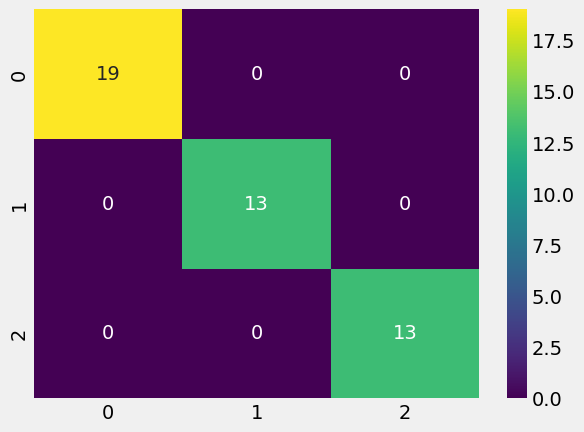

In [41]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, cmap = 'viridis')
plt.show()

## Note

The Iris dataset is often used as a benchmark to test algorithms because it's relatively simple and easy for most classifiers to perform well on. Achieving 100% test accuracy with Random Forest on the Iris dataset is not unusual and reflects the nature of the dataset, which is designed to be an easy starting point for machine learning tasks.